<h1 style="text-align: center;">Réalisez un dashboard et assurez une veille technique projet #8 </h1>

_Reprise comme référence le projet #6 Classifiez automatiquement des biens de consommation_
_Classification par **l'image**_

<div style="text-align: center;">
    <strong>Ce notebook contient les grandes étapes suivantes :</strong>
</div>

0. ✔ **Définition et répartition du dataset Train + Validation + Test**  
   - **Entraînement** du modèle sur le dataset de **TRAIN** **(75% des données)**  
   - **Validation** du modèle sur le dataset de **VALIDATION** **(15% des données)**  
   - **Test** du meilleur modèle sur le dataset de **TEST** **(données jamais vues, 10%)**  
<br>  <!-- 🔹 Saut de ligne ici -->
1. ✔ **Classification supervisée** basique à partir d'images avec le modèle **CNN** (**Convolutional Neural Network - Réseau de Neurones Convolutif**)  



# <span style="color:skyblue">1. Définition</span>

In [1]:
import time # Librairie qui permet de chronométrer
import datetime # Librairie du format des données data heure et temps

# Démarrer le chronomètre
start_time = time.time()

# Afficher l'heure de début
start_datetime = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Début run du notebook : {start_datetime}")


Début run du notebook : 2025-05-29 17:15:52



 1. Un **Réseau** de **Neurones** **Convolutifs** **(CNN)** est un type de réseau de **neurones artificiels** principalement utilisé **pour le traitement des images** et la **vision par ordinateur**.

  - Le **CNN (Convolutional Neural Network)** a été introduit par **Yann LeCun** dans les années **1980** et popularisé en **1998** avec le modèle **LeNet-5**.

 - Il est largement utilisé en vision par ordinateur pour des tâches comme la classification d’images, la détection d’objets et la segmentation. Les modèles modernes comme VGG16, ResNet et EfficientNet ont révolutionné l’apprentissage profond en exploitant des architectures plus profondes et optimisées

2. Il est conçu pour **automatiser** l'extraction **des caractéristiques** à partir d'images grâce à des **couches de <span style="color:red">convolutions** </span>et de <span style="color:red">**pooling**</span>, permettant ainsi une meilleure **reconnaissance des motifs**.


1. ✔ Les **neurones** sont **les unités** de base du **cerveau**, ils transmettent des informations à d'autres cellules nerveuses. (Représentés par **les Neuron cell body sur l’image**)
2. ✔ Ils sont **excitables** et produisent des **événements électriques**. (**Electrical signal** illustré par la **flèche bleue**)
3. ✔ Ils **déclenchent une réaction en chaîne**, où **l'influx nerveux** passe **d'un neurone à l'autre**. **(Synapse marquée par des cercles rouges)**
4. ✔ Les **dendrites captent l'impulsion électrique** et envoient **le message à l'axone**, qui le transmet ensuite au neurone suivant. (Dendrites et Axon sur l’image)
5. ✔ Une fois que le message **atteint sa cible** (par exemple, un muscle ou un autre neurone), un **neurotransmetteur** est libéré au niveau de la synapse et **déclenche une action**. **(Synapse et Axon tips illustrés sur l’image)**

# <span style="color:skyblue">2. Attribution des catégories et des images  </span>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

# Lien du google drive
from google.colab import drive
drive.mount('/content/drive')

# Définition du chemin vers le dossier contenant les images
base_path = "/content/drive/MyDrive/Images"  # C'est le lien qui contient les images à traiter

# Vérification de l'existance du dossier
if os.path.exists(base_path):
    # Lister les fichiers images (.jpg, .jpeg, .png)
    list_photos = [f for f in os.listdir(base_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    # Verrification de l'existance des images
    if len(list_photos) == 0:
        print(f"Attention ! Aucune image trouvée dans le dossier '{base_path}'. Vérifiez le chemin.")
    else:
        print(f"✔ Nombre total d'images trouvées dans '{base_path}' : {len(list_photos)}")
        print("📂 Exemples d'images :", list_photos[:5])  # Afficher 5 fichiers comme exemple

else:
    raise FileNotFoundError(f" Le dossier '{base_path}' n'existe pas ! Il faut verrifier le chemin.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✔ Nombre total d'images trouvées dans '/content/drive/MyDrive/Images' : 1050
📂 Exemples d'images : ['f01140c02fd09e5c56312a64fa8db3da.jpg', '69446af66066146718cd569f87e99fff.jpg', 'b4d35b6536b623c83b293eb3a1c02bba.jpg', 'e2ae2af58ac50adf4881751ae84a9d8a.jpg', '6329ddb46087cb8c09ced95471dd9643.jpg']


In [5]:
import pandas as pd
# Charger et afficher la base de donnéé flikpart
# Affichage des 2 premières lignes
pictorial_dataset = pd.read_csv("flipkart_com-ecommerce_sample_1050.csv")
pictorial_dataset.head(2)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."



- La variable **"image"** contient le **nom du fichier JPG** qui correspond à **l'image du produit**
- La variable **"product_category_tree"** contient la **catégorie des produits** par arboresence **(3 niveaux)**
- On recupère donc le **premier niveau** de la categorie du produit à partir de la colonne **"product_category_tree"** Home Furnishing >> Curtains & Accessories >>

                               product_category_tree    category_niv_0
0  ["Home Furnishing >> Curtains & Accessories >>...  Home Furnishing 
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...        Baby Care 
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...        Baby Care 
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  Home Furnishing 
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  Home Furnishing 


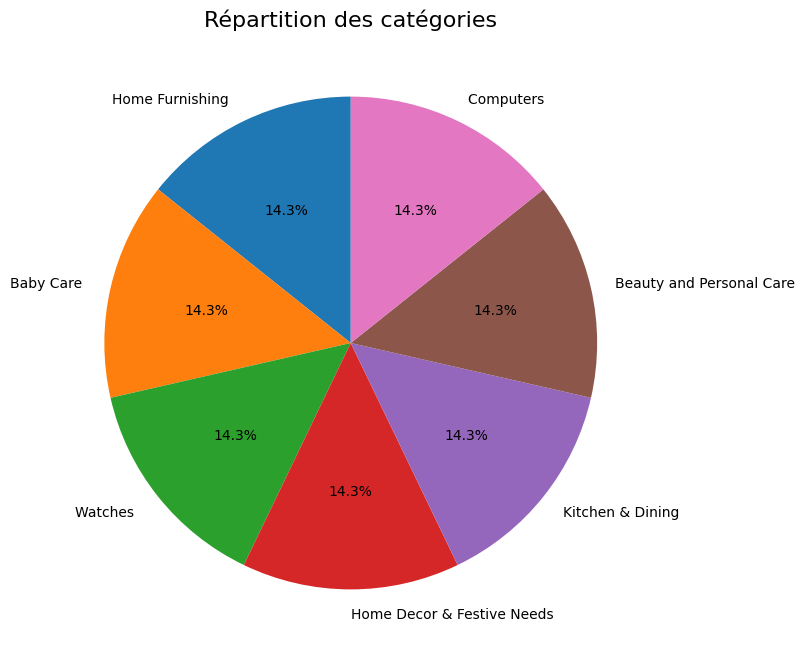

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Fonction pour récupérer le premier niveau de l'arbre des catégories
# Qui est sous cette forme "Home Furnishing >> Curtains & Accessories >>
def recup_cat_niveau_0(pictorial_dataset):
    """
    Fonction récupérer le premier niveau de l'arboresence de la colonne catégorie.
    """
    if "product_category_tree" in pictorial_dataset.columns:
        pictorial_dataset["category_niv_0"] = pictorial_dataset["product_category_tree"].apply(
            lambda x: x.split('["')[1].split(">>")[0] if pd.notnull(x) else None
        )
    else:
        print("La colonne 'product_category_tree' est absente !")
    return pictorial_dataset

# Appliquer la fonction au dataset
pictorial_dataset = recup_cat_niveau_0(pictorial_dataset)

# Vérifier les premières lignes pour s'assurer que la colonne a bien été ajoutée
print(pictorial_dataset[["product_category_tree", "category_niv_0"]].head())

# Compter le nombre d'occurrences pour chaque catégorie de niveau 0
category_counts = pictorial_dataset['category_niv_0'].value_counts()

# Création et affichage d'un diagramme circulaire
plt.figure(figsize=(10, 8))
plt.pie(
    category_counts.values,
    labels=category_counts.index,
    autopct='%1.1f%%',  # Afficher les pourcentages
    startangle=90,      # Rotation pour commencer à 12h
    textprops={'fontsize': 10}  # Taille du texte des étiquettes
)
plt.title("Répartition des catégories", fontsize=16)
plt.show()


In [7]:
# On compte et on affiche le nb. d'enregistrement par catégorie
pictorial_dataset.category_niv_0.value_counts()

,count
category_niv_0,
Home Furnishing,150
Baby Care,150
Watches,150
Home Decor & Festive Needs,150
Kitchen & Dining,150
Beauty and Personal Care,150
Computers,150


In [8]:
# On affiche la liste des colonne du dataset flikpart
pictorial_dataset.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications', 'category_niv_0'],
      dtype='object')

In [9]:
# On affiche respectivement
# 1. Le nom des fichiers correspondants aux images format jpg
# 2. Les catégories des produits correspondantes aux images
pictorial_dataset[["image","category_niv_0"]]

,image,category_niv_0
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care
3,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing
...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc.jpg,Baby Care
1046,fd6cbcc22efb6b761bd564c28928483c.jpg,Baby Care
1047,5912e037d12774bb73a2048f35a00009.jpg,Baby Care
1048,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Baby Care


In [10]:
# On affiche la liste des catégories de produits
pictorial_dataset["category_niv_0"].unique()

array(['Home Furnishing ', 'Baby Care ', 'Watches ',
       'Home Decor & Festive Needs ', 'Kitchen & Dining ',
       'Beauty and Personal Care ', 'Computers '], dtype=object)

In [11]:
# Encodage des Labels Catégoriels avec LabelEncoder.
# Ce script utilise "LabelEncoder" provenant de "scikit-learn" pour convertir une colonne catégorielle.
# "category_niv_0" en valeurs numériques "label" en vue de la préparation des données.
# Certain modèle de Machine Learning ne peuvent pas traiter de valeur textuelles.

# Importation des bibliothèques
import pandas as pd  # Manipulation des données
from sklearn.preprocessing import LabelEncoder  # Encodage des labels catégoriels

# Encodage de la colonne catégorielle
# On initialise l'instance de LabelEncoder
le = LabelEncoder()

# Transformation de la colonne "category_niv_0" en valeurs numériques
# La colonne label correspondra à l'encodage des catégories numériques
pictorial_dataset["label"] = le.fit_transform(pictorial_dataset["category_niv_0"])

# Affichage des valeurs **uniques** des labels encodés
# Pour visualiser la correspondance entre les valeurs catégoriques et leurs codes numériques
print(pictorial_dataset[["label", "category_niv_0"]].drop_duplicates())

# Affichage des premières lignes du dataset encodé
# Verrification de la colonne contenant les valeurs encodés
pictorial_dataset.head(3)


    label               category_niv_0
0       4             Home Furnishing 
1       0                   Baby Care 
5       6                     Watches 
36      3  Home Decor & Festive Needs 
37      5            Kitchen & Dining 
43      1    Beauty and Personal Care 
47      2                   Computers 


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,category_niv_0,label
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,4
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,0
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,0


In [12]:
# On verrifie l'activation de l'encodage
# On affiche sous forme de liste la liste des catégories de produits encodés
pictorial_dataset["label"].unique()

array([4, 0, 6, 3, 5, 1, 2])

In [13]:
# On renomme la colonne category_niv_0 par label_name
# Pour des futures opérations
pictorial_dataset.rename(columns={"category_niv_0": "label_name"}, inplace=True)

# On affiche la colonne label name
pictorial_dataset["label_name"]

,label_name
0,Home Furnishing
1,Baby Care
2,Baby Care
3,Home Furnishing
4,Home Furnishing
...,...
1045,Baby Care
1046,Baby Care
1047,Baby Care
1048,Baby Care


In [14]:
import pandas as pd

# Trier le dataset par "label_name" pour garder l'ordre des catégories
pictorial_dataset = pictorial_dataset.sort_values(by=["label_name"]).reset_index(drop=True)

# Modifier l'"image_path" pour qu'il corresponde à "label_name + index"
pictorial_dataset["image_path"] = pictorial_dataset["label_name"] + pictorial_dataset.index.astype(str)

# Affichage des premières et dernières lignes pour vérifier l'application des opérations
pictorial_dataset[["image_path","label_name","label"]].head()

,image_path,label_name,label
0,Baby Care 0,Baby Care,0
1,Baby Care 1,Baby Care,0
2,Baby Care 2,Baby Care,0
3,Baby Care 3,Baby Care,0
4,Baby Care 4,Baby Care,0


In [15]:
# On effectue un test pour verrifier l'application de la labélisation
# On sélectionne une ligne du dataset par hasard
# On verrifie si la catgorie de produit est cohérente avec l'image du produit
pictorial_dataset[["image","image_path","label_name","label"]].iloc[625]

,625
image,ff24511994fc459d04145231c8876d6c.jpg
image_path,Home Furnishing 625
label_name,Home Furnishing
label,4


- Aprés ouverture du fichier dans le dossier des images, le test se révèle correct le fichier jpg **"ff24511994fc459d04145231c8876d6c.jpg"** correspond bien à une image correspondante à la catégorie de produit **"Home Furnishing"**

Baby Care 


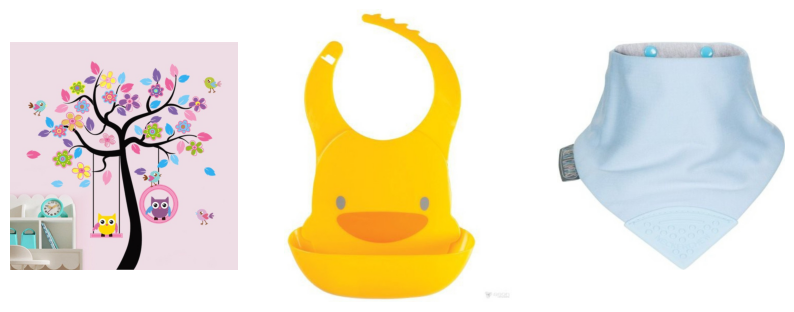

Beauty and Personal Care 


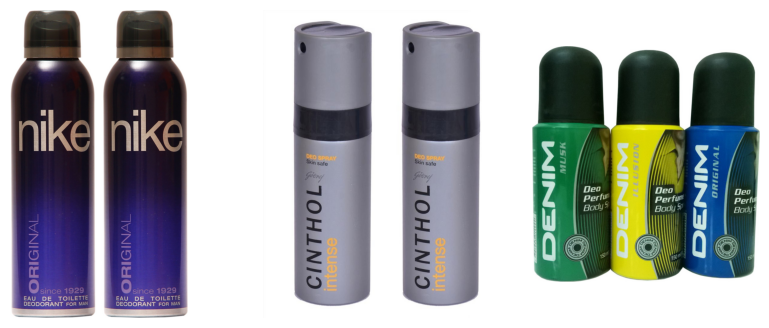

Computers 


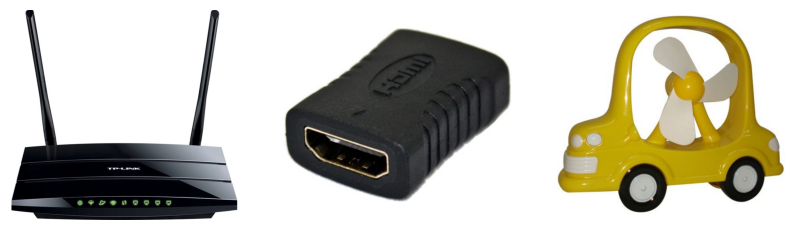

Home Decor & Festive Needs 


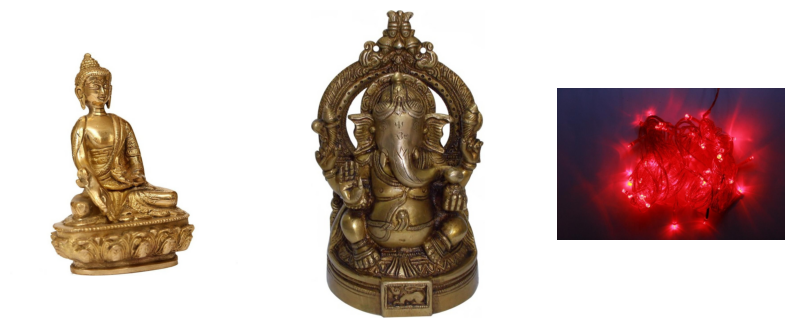

Home Furnishing 


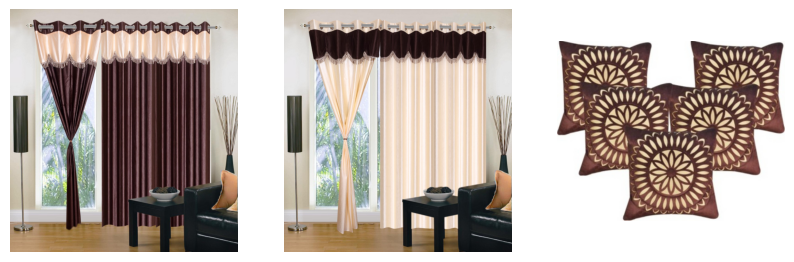

Kitchen & Dining 


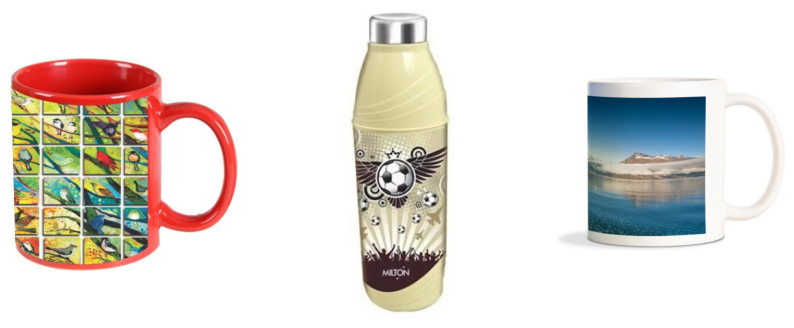

Watches 


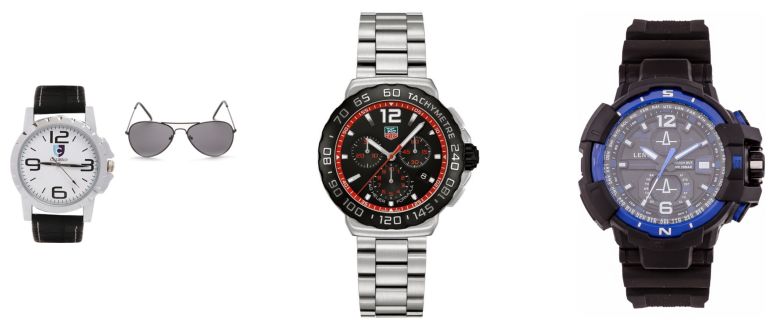

In [16]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Définition des catégories à afficher provenant de pictorial_dataset
list_labels = pictorial_dataset["label_name"].unique()  # Affichage de la liste des catégories uniques

# Fonction pour récupérer des images d'une catégorie spécifique
def list_fct(category):
    return pictorial_dataset[pictorial_dataset["label_name"] == category]["image"].tolist()

# Définition du chemin vers les images
# Ce chemin d'accès correspond au dossier ou sont stockés les images du projet
path = "/content/drive/MyDrive/Images"

# Vérification si le dossier d'images existe
if not os.path.exists(path):
    print(f"Le dossier '{path}' n'existe pas ! Il faut vérrifier le chemin d'accès")
else:
    # Affichage des images par catégorie
    for category in list_labels:
        print(category)  # Affichage du nom de la catégorie

        # Liste des images pour la catégorie en question
        list_images = list_fct(category)

        # Vérifier s'il y a assez d'images à afficher
        # Ici supérieur ou = à 3
        if len(list_images) < 3:
            print(f"Pas assez d'images pour {category}, affichage limité à {len(list_images)} images")

        # Création de la figure avec une ligne et 3 colonnes maximum
        plt.figure(figsize=(10, 4))

        for i in range(min(3, len(list_images))):  # Afficher 3 images maximum
            filename = os.path.join(path, list_images[i])
            if not os.path.exists(filename):  # Vérrification de l'existance du fichier
                print(f"Image non trouvée : {filename}")
                continue

            image = imread(filename)  # Lecture de l'image
            plt.subplot(1, 3, i + 1)
            plt.imshow(image)
            plt.axis("off")  # On désactive les axes

        plt.show()  # On affiche l'imahe show de matplotlib


In [17]:
# On affiche les deux premières lignes du dataset
pictorial_dataset.head(2)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,label_name,label,image_path
0,f2f027ad6a6df617c9f125173da71e44,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-large-vinyl-s...,Uberlyfe Large Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE2ZEPACRQJKH7,1190.0,595.0,f2f027ad6a6df617c9f125173da71e44.jpg,False,Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...,4,4,Uberlyfe,"{""product_specification""=>[{""key""=>""Sales Pack...",Baby Care,0,Baby Care 0
1,4e03d4e81e6a876f512536f6a57c053e,2016-06-20 15:20:40 +0000,http://www.flipkart.com/piyo-four-stage-waterp...,Piyo Piyo Four Stage Waterproof Bib,"[""Baby Care >> Feeding & Nursing >> Bibs & Han...",BIBEJCBYSWXBFFJ9,3326.0,2376.0,4e03d4e81e6a876f512536f6a57c053e.jpg,False,Specifications of Piyo Piyo Four Stage Waterpr...,No rating available,No rating available,Piyo Piyo,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Baby Care,0,Baby Care 1


--------------------------------------------------**Identification des variables explicatives & cibles**------------------------------------------------
- La colonne **"image"** contient le **nom du fichier JPG** qui correspond à **l'image du produit**.
- La colonne **"product_category_tree"** contient la **catégorie des produits** par arboresence **(3 niveaux)**.
- On recupère donc le **premier niveau** de la categorie du produit à partir de la colonne **"product_category_tree"**.

# <span style="color:skyblue"> 3. Mise en place du modèle **CNN Convolution Neural Network**

##### <span style="color:skyblue"> 3.1 Définition du modèle et préparation des images  </span> | Classification **supervisée**

LES **HYPERPARAMÈTRES**  DU MODÈLE DE CLASSIFICATION **SUPERPERVISÉ** | **Convolutional, Neural, Network** | **Réseau de neuronne Convolutif**

Ces hyperparamètres sont utilisés pour entraîner un **réseau** de **neurones** **convolutifs** (CNN).

| Hyperparamètre   | Description et Définition |
|-----------------|--------------------------|
| **learning_rate** | **Taux d’apprentissage** de **l’optimiseur** **Adam**. **Définition** : Le learning rate contrôle la vitesse à laquelle le modèle met à jour ses poids. Une valeur **trop élevée peut empêcher la convergence**, tandis qu'une valeur **trop basse ralentit l’apprentissage**. |
| **batch_size**   | Taille des mini-lots pour l'entraînement. **Définition** : Nombre d’échantillons utilisés pour mettre à jour les poids du réseau avant d'effectuer une rétropropagation. Un batch plus grand améliore la stabilité mais nécessite plus de mémoire. |
| **epochs**       | Nombre d'itérations d’entraînement sur l’ensemble des données. **Définition** : Une époque correspond à un passage complet sur l’ensemble des données d'entraînement. Plus le nombre d’époques est élevé, plus le modèle a de chances d’apprendre des patterns complexes, mais il risque aussi de sur-apprendre (overfitting). |
| **dropout_rate** | Taux de dropout pour éviter l'overfitting. **Définition** : Fraction de neurones désactivés aléatoirement à chaque itération pour empêcher le modèle de trop s’adapter aux données d’entraînement et améliorer la généralisation. |
| **num_filters**  | Nombre de filtres pour les couches convolutionnelles. **Définition** : Les filtres détectent les motifs visuels (bords, textures, formes) dans les images. Plus le nombre de filtres est élevé, plus le réseau peut capturer de détails. |
| **kernel_size**  | Taille des noyaux de convolution. **Définition** : Dimensions du filtre utilisé pour extraire les caractéristiques locales d’une image. Une taille typique est (3x3) ou (5x5). |
| **dense_units**  | Nombre de neurones dans la couche dense finale. **Définition** : Définit la capacité de la couche fully connected à apprendre des représentations complexes des données extraites par les couches convolutionnelles. |

- Exemple d'utilisation en Python

```python
hyperparams = {
    "learning_rate": 0.001,
    "batch_size": 64,
    "epochs": 20,
    "dropout_rate": 0.3,
    "num_filters": 32,
    "kernel_size": (3, 3),
    "dense_units": 128
}

print(hyperparams)

| **Étape**                                      | **Description** |
|------------------------------------------------|----------------|
| **Importation des bibliothèques**              | Importation des modules nécessaires : `VGG16` (modèle pré-entraîné), `Model` (API fonctionnelle de Keras), et des couches (`GlobalAveragePooling2D`, `Dense`, `Dropout`). |
| **Définition de la fonction `create_model_fct()`** | Fonction permettant de construire un **modèle CNN** en réutilisant **VGG16** avec des couches supplémentaires. |
| **Chargement de VGG16 pré-entraîné**           | Chargement du modèle `VGG16`, entraîné sur **ImageNet**, sans sa couche de classification (`include_top=False`). Il sert d’extracteur de caractéristiques. |
| **Empêcher l'entraînement des couches existantes** | Les poids du modèle pré-entraîné sont **gelés** (`trainable=False`) pour conserver les **features** déjà apprises. Cela accélère l'entraînement et évite l'overfitting. |
| **Ajout d'une couche de Pooling Global**       | `GlobalAveragePooling2D()` réduit la dimensionnalité des **features** extraits en faisant une moyenne globale, ce qui améliore la généralisation et diminue le nombre de paramètres. |
| **Ajout d'une couche Dense avec activation ReLU** | `Dense(256, activation='relu')` permet d'ajouter une couche totalement connectée pour apprendre des caractéristiques spécifiques en introduisant de la non-linéarité avec l'activation **ReLU**. |
| **Ajout d'une couche de Dropout (50%)**        | `Dropout(0.5)` désactive aléatoirement **50% des neurones** pour éviter l'**overfitting** et améliorer la robustesse du modèle. |
| **Ajout de la couche de sortie**               | `Dense(7, activation='softmax')` : **7 neurones**, un par classe, avec une activation **softmax** pour obtenir des **probabilités** de classification. |
| **Création du modèle final**                   | Le modèle est assemblé en reliant la sortie de VGG16 aux nouvelles couches de classification. |
| **Compilation du modèle**                      | Définition des paramètres d’entraînement : fonction de perte `categorical_crossentropy`, optimiseur `rmsprop`, et métrique `accuracy` pour suivre la performance. |
| **Affichage du résumé du modèle**              | `model.summary()` affiche l'**architecture détaillée** du modèle, le nombre de **paramètres entraînables/non-entraînables** et la structure des couches. |
| **Retour du modèle**                           | `return model` permet d’utiliser le modèle construit pour l’entraînement. |
| **Test de la fonction**                        | `model = create_model_fct()` exécute la fonction et affiche la structure du modèle avant de l’entraîner. |


 1️⃣ **Couches Convolutives (Conv Layers)**
- Détectent les motifs visuels (bords, textures, formes...) dans l'image.
- Utilisent des filtres de convolution de taille (3x3) avec activation ReLU.
- Suivies de couches de MaxPooling (2x2) pour réduire la taille des cartes de caractéristiques.


 2️⃣ **Structure en Blocs**
Le réseau est organisé en 5 blocs :

- Bloc 1 → 2 couches Conv (64 filtres, 3x3) + MaxPooling (2x2)
- Bloc 2 → 2 couches Conv (128 filtres, 3x3) + MaxPooling (2x2)
- Bloc 3 → 3 couches Conv (256 filtres, 3x3) + MaxPooling (2x2)
- Bloc 4 → 3 couches Conv (512 filtres, 3x3) + MaxPooling (2x2)
- Bloc 5 → 3 couches Conv (512 filtres, 3x3) + MaxPooling (2x2)
Chaque bloc double le nombre de filtres pour capturer des détails plus complexes.


3️⃣ **Couches Entièrement Connectées (Fully Connected Layers)**
Après les convolutions, les cartes de caractéristiques sont transformées en vecteurs 1D et passent par des couches entièrement connectées :

- Flatten (Transforme en vecteur 1D)
- Dense (4096 neurones, activation ReLU)
- Dense (4096 neurones, activation ReLU)
- Dense (1000 neurones, activation Softmax) (Classification sur 1000 classes d'ImageNet)

 4️⃣ **Activation et Normalisation**
- **ReLU** : Activation utilisée dans les couches convolutives et fully connected.
- **Softmax** : Activation finale pour la classification.
- **Dropout (optionnel)** : Évite le sur-apprentissage.

**VGG16 en résumé**
- ✔ Précision élevée sur ImageNet
- ✔ Facilement adaptable à d'autres tâches (Fine-tuning)
- ✔ Architecture simple et efficace

**VGG16** est un modèle puissant composé de couches **convolutives**, de **MaxPooling** et de **couches entièrement connectées**, conçu pour **classifier 1000 classes d'ImageNet**, mais il est souvent utilisé comme **extracteur de caractéristiques** dans d'autres modèles.

- **TensorFlow** est une bibliothèque open source développée par Google pour le calcul numérique et l'apprentissage automatique, notamment pour la création et l'entraînement de réseaux de neurones profonds. Il utilise des tenseurs (tableaux multidimensionnels) et des graphes de flux de données pour représenter et exécuter des opérations mathématiques, facilitant ainsi le développement de modèles de machine learning




---------------------------------------------------------------------------------------------------------------------------------------------------------
| **Type de Couches**       | **Détails**                                      |
|---------------------------|--------------------------------------------------|
| **Entrée**               | Image **(224, 224, 3)**                          |
| **Bloc 1**               | `Conv(64, 3x3) → Conv(64, 3x3) → MaxPool`        |
| **Bloc 2**               | `Conv(128, 3x3) → Conv(128, 3x3) → MaxPool`      |
| **Bloc 3**               | `Conv(256, 3x3) → Conv(256, 3x3) → Conv(256, 3x3) → MaxPool` |
| **Bloc 4**               | `Conv(512, 3x3) → Conv(512, 3x3) → Conv(512, 3x3) → MaxPool` |
| **Bloc 5**               | `Conv(512, 3x3) → Conv(512, 3x3) → Conv(512, 3x3) → MaxPool` |
| **Flatten**              | Conversion des cartes en vecteur 1D              |
| **Dense (4096, ReLU)**   | Couche entièrement connectée                     |
| **Dense (4096, ReLU)**   | Couche entièrement connectée                     |
| **Dense (1000, Softmax)**| Sortie pour classification **ImageNet**          |



In [19]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 123.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 134.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 127.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 148.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 8.5 MB/s eta 0:00:00


In [ ]:

# Importation des bibliothèques nécessaires

import pandas as pd  # Manipulation et analyse de données sous forme de DataFrame
import numpy as np  # Calculs numériques et manipulation de tableaux multidimensionnels
import matplotlib.pyplot as plt  # Visualisation des données sous forme de graphiques
import seaborn as sns  # Visualisation avancée des données avec des graphiques esthétiques
%matplotlib inline
# Affiche les graphiques directement dans le notebook (Jupyter)

import os  # Gestion des chemins et opérations sur le système de fichiers
from os import listdir  # Liste les fichiers dans un répertoire
from sklearn.model_selection import train_test_split  # Division des données en ensembles d'entraînement, validation et test
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve  # Évaluation des performances du modèle avec des métriques comme l'AUC et la précision
from glob import glob  # Recherche de fichiers avec des motifs spécifiques (wildcards)

import tensorflow as tf  # Framework pour le deep learning et l'entraînement de modèles CNN
from tensorflow.keras.models import Model, Sequential  # Définition et manipulation de modèles Keras (fonctionnels ou séquentiels)
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalAveragePooling1D, Flatten, Dense, Dropout  # Couches utilisées pour le modèle CNN (extraction de caractéristiques, couches fully connected)
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom  # Couches de prétraitement et Data Augmentation pour améliorer la généralisation du modèle
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint  # Callbacks pour arrêter l'entraînement tôt ou sauvegarder les meilleurs poids du modèle
from tensorflow.keras.applications.vgg16 import VGG16  # Modèle pré-entraîné VGG16 pour le transfert d'apprentissage
from tensorflow.keras.applications.vgg16 import preprocess_input  # Prétraitement spécifique au modèle VGG16 (normalisation des pixels)
from tensorflow.keras.preprocessing.image import load_img, img_to_array  # Chargement et conversion des images en tableaux NumPy compatibles avec Keras
from tensorflow.keras.utils import to_categorical  # Conversion des labels en One-Hot Encoding pour les tâches de classification multi-classes


In [21]:
# Importation des bibliothèques nécessaires
import numpy as np  # Bibliothèque pour les calculs numériques et manipulation de tableaux multidimensionnels
import os  # Module pour gérer les chemins et effectuer des opérations sur le système de fichiers
from tensorflow.keras.preprocessing.image import load_img, img_to_array  # Fonctions pour charger et convertir les images en tableaux NumPy
from tensorflow.keras.applications.vgg16 import preprocess_input  # Fonction de prétraitement spécifique au modèle VGG16
import tensorflow as tf  # Framework pour le deep learning et l'entraînement de modèles CNN
from PIL import Image  # Bibliothèque pour manipuler les images (chargement, conversion, etc.)
from sklearn.model_selection import train_test_split  # Fonction pour diviser les données en ensembles d'entraînement, validation et test

def create_model_fct():
    """
    Crée un modèle CNN basé sur VGG16 avec transfert d'apprentissage.
    Les couches pré-entraînées sont gelées, et des couches personnalisées sont ajoutées pour la classification.
    """
    # Récupération du modèle VGG16 pré-entraîné sans la tête (include_top=False)
    model0 = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

    # Rendre les couches du modèle pré-entraîné non entraînables
    for layer in model0.layers:
        layer.trainable = False

    # Récupérer la sortie du réseau pré-entraîné (VGG16)
    x = model0.output

    # Ajouter une couche GlobalAveragePooling2D pour réduire les dimensions spatiales
    x = GlobalAveragePooling2D()(x)

    # Ajouter une couche dense avec 256 neurones et activation ReLU
    x = Dense(256, activation='relu')(x)

    # Ajouter une couche Dropout avec un taux de 50% pour réduire le surapprentissage
    x = Dropout(0.5)(x)

    # Ajouter une couche finale dense avec 7 neurones (7 catgories) et activation softmax (classification multi-classes)
    predictions = Dense(7, activation='softmax')(x)

    # Définir le nouveau modèle en combinant le réseau pré-entraîné et les nouvelles couches ajoutées
    model = Model(inputs=model0.input, outputs=predictions)

    # Compiler le modèle avec la fonction de perte categorical_crossentropy et l'optimiseur RMSProp
    model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

    # Afficher un résumé du modèle (architecture et nombre de paramètres)
    print(model.summary())

    return model  # Retourner le modèle créé


In [22]:
# Importation des bibliothèques nécessaires
import os  # Module pour gérer les chemins et effectuer des opérations sur le système de fichiers
import numpy as np  # Bibliothèque pour les calculs numériques et manipulation de tableaux multidimensionnels
from tensorflow.keras.preprocessing.image import load_img, img_to_array  # Fonctions pour charger et convertir les images en tableaux NumPy
from tensorflow.keras.applications.vgg16 import preprocess_input  # Fonction de prétraitement spécifique au modèle VGG16
from tensorflow.keras.utils import to_categorical  # Fonction pour convertir les labels en One-Hot Encoding (classification multi-classes)
from sklearn.model_selection import train_test_split  # Fonction pour diviser les données en ensembles d'entraînement, validation et test

# Fonction pour charger et prétraiter les images
def image_prep_fct(image_dir):
    """
    Charge, redimensionne et prétraite les images à partir d'un dossier spécifié.

    Entrée :
        - image_dir : Chemin du dossier contenant les images.

    Sortie :
        - Tableau NumPy contenant les images sous la forme (nb_images, 224, 224, 3).
    """
    prepared_images = []  # Liste pour stocker les images prétraitées

    # Vérifier que le dossier existe
    if not os.path.exists(image_dir):
        raise ValueError(f"Le dossier spécifié n'existe pas : {image_dir}")

    # Récupérer tous les fichiers d'images dans le dossier
    image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    # Vérifier qu'il y a des fichiers dans le dossier
    if len(image_files) == 0:
        raise ValueError(f"Aucune image valide trouvée dans le dossier : {image_dir}")

    # Charger et prétraiter chaque image
    for full_path in image_files:
        try:
            img = load_img(full_path, target_size=(224, 224))  # Charger l'image et la redimensionner à 224x224
            img = img_to_array(img)  # Convertir l'image en tableau NumPy
            img = preprocess_input(img)  # Normaliser l'image avec preprocess_input (spécifique à VGG16)
            prepared_images.append(img)  # Ajouter l'image prétraitée à la liste
        except Exception as e:
            print(f"Erreur lors du chargement de l'image {full_path} : {e}")  # Afficher une erreur si une image ne peut pas être chargée

    prepared_images_np = np.array(prepared_images, dtype=np.float32)  # Convertir la liste en tableau NumPy
    return prepared_images_np

# Charger les images depuis le dossier spécifié
base_path = "/content/drive/MyDrive/Images"  # Chemin du dossier contenant les images
if os.path.exists(base_path):
    X_data = image_prep_fct(base_path)  # Appeler la fonction pour charger et prétraiter les images
    print(f"Forme des données d'entraînement (X_data) : {X_data.shape}")  # Afficher la forme des données chargées
else:
    raise ValueError(f"Le dossier spécifié n'existe pas : {base_path}")  # Lever une erreur si le dossier n'existe pas

# Charger les labels associés aux images
if 'pictorial_dataset' not in globals() or pictorial_dataset is None:
    raise ValueError("Le dataset n'est pas défini ou est vide ! S'assurer qu'il est bien chargé !.")  # Vérifier que le dataset des labels est défini

y_data = to_categorical(pictorial_dataset['label'])  # Convertir les labels en One-Hot Encoding

# Vérifier que le nombre de labels correspond au nombre d'images
if len(y_data) != len(X_data):
    raise ValueError(f"Incohérence : {len(X_data)} images mais {len(y_data)} labels.")  # Lever une erreur si le nombre de labels ne correspond pas au nombre d'images

# Étape 1 : Séparation des données en TRAIN+VAL (90%) et TEST (10%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_data,  # Images prétraitées (features)
    y_data,  # Labels associés aux images (cibles/classes)
    stratify=pictorial_dataset['label'],  # Répartition équilibrée des classes entre train+val et test
    test_size=0.1,  # Réserver 10% du dataset pour le test
    random_state=42  # Fixer une graine aléatoire pour garantir la reproductibilité des résultats
)

# Étape 2 : Séparation des données TRAIN+VAL en TRAIN (75%) et VAL (15%)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,  # Les données restantes après avoir extrait le test (90% du dataset)
    y_train_val,  # Les labels associés aux données restantes
    stratify=y_train_val.argmax(axis=1),  # Répartition équilibrée des classes entre train et validation (indices des classes)
    test_size=0.1667,  # Réserver ~16.67% des données restantes pour validation (~15% du dataset total)
    random_state=42  # Fixer une graine aléatoire pour garantir la reproductibilité des résultats
)

# Vérification après séparation
print(f"Train dataset: {X_train.shape}, {y_train.shape}")  # Afficher la forme des ensembles d'entraînement après séparation
print(f"Validation dataset: {X_val.shape}, {y_val.shape}")  # Afficher la forme des ensembles de validation après séparation
print(f"Test dataset: {X_test.shape}, {y_test.shape}")  # Afficher la forme des ensembles de test après séparation


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Forme des données d'entraînement (X_data) : (1050, 224, 224, 3)
Train dataset: (787, 224, 224, 3), (787, 7)
Validation dataset: (158, 224, 224, 3), (158, 7)
Test dataset: (105, 224, 224, 3), (105, 7)


In [23]:
# Vérification des valeurs min et max après preprocess_input() de VGG16
print(f"Vérification de la normalisation des images variables explicatives :")
print(f"   ➤ Min de X_train : {round(X_train.min(), 2)}")
print(f"   ➤ Max de X_train : {round(X_train.max(), 2)}")
print(f"   ➤ Min de X_val : {round(X_val.min(), 2)}")
print(f"   ➤ Max de X_val : {round(X_val.max(), 2)}")
print(f"   ➤ Min de X_test : {round(X_test.min(), 2)}")
print(f"   ➤ Max de X_test : {round(X_test.max(), 2)}")

# Vérification qu'on est bien dans l'intervalle attendu pour les images d'entraînement
assert -124 <= X_train.min() <= -123, "Min de X_train est hors des valeurs attendues !"
assert 150 <= X_train.max() <= 152, "Max de X_train est hors des valeurs attendues !"

# Vérification qu'on est bien dans l'intervalle attendu pour les images de validation
assert -124 <= X_val.min() <= -123, "Min de X_val est hors des valeurs attendues !"
assert 150 <= X_val.max() <= 152, "Max de X_val est hors des valeurs attendues !"

# Vérification qu'on est bien dans l'intervalle attendu pour les images de test
assert -124 <= X_test.min() <= -123, "Min de X_test est hors des valeurs attendues !"
assert 150 <= X_test.max() <= 152, "Max de X_test est hors des valeurs attendues !"

print("\n La Normalisation est compatible pour le modèle VGG16 !")
print("\n Les valeurs sont bien dans l'intervalle attendue")

Vérification de la normalisation des images variables explicatives :
   ➤ Min de X_train : -123.68000030517578
   ➤ Max de X_train : 151.05999755859375
   ➤ Min de X_val : -123.68000030517578
   ➤ Max de X_val : 151.05999755859375
   ➤ Min de X_test : -123.68000030517578
   ➤ Max de X_test : 151.05999755859375

 La Normalisation est compatible pour le modèle VGG16 !

 Les valeurs sont bien dans l'intervalle attendue


In [24]:
# Afficher un aperçu des données (2 lignes) - du dataset Train (Entraînement)
print("\n Extrait de X_train (Images - EXPLICATIVES 75% pour l'entraînement du modèle VGG16) :", X_train[:2])
print("\n Extrait de y_train (Labels - CIBLES) :", y_train[:2])


 Extrait de X_train (Images - EXPLICATIVES 75% pour l'entraînement du modèle VGG16) : [[[[151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   ...
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]]

  [[151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   ...
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]]

  [[151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   ...
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]]

  ...

  [[151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   ...
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]]

  [[151.061   138.22101 131.32

In [25]:
# Afficher un aperçu des données (2 lignes) - du datatset (Validation)
print("\n Extrait de X_val (Images - EXPLICATIVES 15% pour le test du modèle VGG16) :", X_val[:2])
print("\n Extrait de y_val(Labels - CIBLES) :", y_val[:2])


 Extrait de X_val (Images - EXPLICATIVES 15% pour le test du modèle VGG16) : [[[[151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   ...
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]]

  [[151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   ...
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]]

  [[151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   ...
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]]

  ...

  [[151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   ...
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]]

  [[151.061   138.22101 131.32   ]
   [

In [26]:
# Afficher un aperçu des données (2 lignes) - du datatset (Test)
print("\n Extrait de X_test (Images - EXPLICATIVES 10% pour le test du modèle VGG16) :", X_test[:2])
print("\n Extrait de y_test(Labels - CIBLES) :", y_test[:2])


 Extrait de X_test (Images - EXPLICATIVES 10% pour le test du modèle VGG16) : [[[[151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   ...
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]]

  [[151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   ...
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]]

  [[151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   ...
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]]

  ...

  [[151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   ...
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]
   [151.061   138.22101 131.32   ]]

  [[151.061   138.22101 131.32   ]
   

- Le script prétraite un ensemble d'images pour les rendre compatibles avec le modèle Visual Geometry Group 16 couches un **CNN**.
- CNN définition en **anglais** : **Convolutional Neural Network**
- CNN définition en **francais** : **Réseau de Neurones Convolutifs**

Les etapes de préparation des images :
- ✔ **Vérification des valeurs après normalisation**
- ✔ **Conversion des images en tableaux NumPy**
- ✔ **Normalisation via preprocess_input() de VGG16**
- ✔ **Validation des valeurs min/max après la transformation**



_VGG16 attend des images prétraitées avec preprocess_input(), qui centre les pixels en fonction des moyennes du dataset ImageNet. Après cette transformation, les valeurs des pixels doivent être comprises entre approximativement ≈ -124 et 150._

- ✔ 224 : **Hauteur** de l'image en pixels.
- ✔ 224 : **Largeur** de l'image en pixels.
- ✔ Canaux : 3 (Rouge, Vert, Bleu – RVB / Red, Green, Blue)

La normalisation est appliquée avec succès et elle est compatible avec **VGG16.**

| **Dataset**  | **Contenu**              | **Description**                                 |
|-------------|------------------------|---------------------------------------------|
| **`X_train`**  | Images **d'entraînement**  | Utilisé pour **entraîner** le modèle **(75%)**    |
| **`y_train`**  | Labels **d'entraînement**  | Labels associés aux **images d'entraînement** |
| **`X_val`**   | Images de **validation**    | Utilisé pour **évaluer** le modèle **(15%)**      |
| **`y_val`**  | Labels de **validation**  | Labels associés aux images de validation |
| **`X_test`**  | Images de **test**  | Utilisé pour **tester** le modèle **(10%)** avec les **meilleurs paramètres** |
| **`y_test`**  | Labels de **test**  | Labels associés aux images pour effectuer le **test** |



**Représentation des Images en Tenseur**

1. X_train : Une Représentation Numérique d'Images  
- Chaque **pixel** est encodé par des **valeurs numériques** représentant les **couleurs**.  
- Un pixel est défini par **trois nombres** correspondant aux couleurs **🔴 Rouge (R), 🟢 Vert (V) et 🔵 Bleu (B)**.  
- **Exemple** : `151.061, 138.22101, 131.32`  
  - **🔴 151.061 → Intensité du Rouge**  
  - **🟢 138.22101 → Intensité du Vert**  
  - **🔵 131.32 → Intensité du Bleu**  


2. Normalisation des Pixels :
- **Avant normalisation** : les valeurs des pixels varient **entre 0 et 255**.  
- **Après normalisation** : les valeurs sont ramenées **entre 0 et 1** (division par 255) pour optimiser l'apprentissage du modèle.  



3. Structure des Données :
- **X_train contient plusieurs images**, chaque image étant un tableau `(224, 224, 3)`.  
- `(224, 224, 3)` → **224 pixels de hauteur, 224 pixels de largeur, 3 canaux de couleurs (RVB)**.  



4. Interprétation des Valeurs par un CNN :
- Un **réseau de neurones convolutif (CNN)** détecte **des motifs visuels** grâce aux valeurs **RVB**.  
- **Ces valeurs de pixels** sont analysées par des **filtres convolutifs** pour extraire des **caractéristiques importantes** (bords, textures, formes…).  



5. Les Labels (y_train) :
- **Exemple** : `y_train = [0, 0]` → **Les 2 premières images appartiennent à la catégorie 0 ("Baby Care")**.  
- **Chaque label** est associé à une catégorie spécifique, permettant au modèle d’apprendre à classer les images correctement.  



**Synthèse**:
- **X_train** = Matrices d’images sous forme de tenseur `(224, 224, 3)`.  
- **Chaque pixel** est défini par 3 valeurs **RVB** (Rouge, Vert, Bleu).  
- **Les valeurs sont normalisées** (0-255 → 0-1) pour **optimiser l’apprentissage du modèle CNN**.  
- **y_train contient les labels** des images, indiquant la catégorie de chaque image.  



 **Pourquoi `preprocess_input` de VGG16 ?**  
- **Centre les valeurs autour de zéro** pour s’adapter au modèle pré-entraîné.  
- **Convertit l’image en valeurs entières (uint8)** pour un affichage correct.  
- **Associe l’image à un label** spécifique dans le dataset.  


- ✔ **Garantit** la **compatibilité** avec **TensorFlow/Keras** pour **l’entraînement du modèle**.
- ✔ **Prévient** les **erreurs potentielles** lors de l’appel à **.fit() (incompatibilité des types de données)**.
- ✔ **S’assure que les transformations appliquées aux données** (préprocessing, encodage) n’ont pas altéré leur format.

**Les étapes**:

1. Entraînement sur **X_train** → Prédiction de **y_train_pred** par **VGG16** → Comparaison avec **y_train** pour ajuster les **poids** et améliorer la **précision du modèle**.
2. Validation sur **X_val** (données jamais vues par le modèle) → Prédiction de **y_val_pred** → Comparaison avec **y_val** pour **ajuster les hyperparamètres** et **sélectionner le meilleur modèle**.
3. Test final sur **X_test** (données totalement inconnues) → Prédiction de **y_test_pred** → Comparaison avec **y_test** pour mesurer la performance réelle du modèle en conditions réelles.

**Exemple:**
- **VGG16** est un **modèle pré-entraîné sur ImageNet**, il à deja appris à reconnaitre **100 catégories d'objets** (ex chat, chien, voitures...)
- On doit l'adapter ensuite à notre **tâche spécifique**.
- **Entraînement** → On montre au **modèle des variables explicatives** **X_train** (les images) et il prédit les variables cibles **y_train** (les catégories) puis **il mesure ses erreurs** et **ajuste ses poids** en **fonction des erreurs**.
- **Validation** → On fait un test blanc pour voir si le modèle est prêt (pas de modification de connaissances, Verrification du niveau).
- **Test final** → Examen officiel (Le modèle applique ce qu'il à appris sans rien changer).

In [ ]:

# Importation des bibliothèques nécessaires

import tensorflow as tf  # Framework pour le deep learning et l'entraînement de modèles CNN
from tensorflow.keras.applications import VGG16  # Modèle pré-entraîné VGG16 pour le transfert d'apprentissage
from tensorflow.keras.models import Model  # Classe pour définir un modèle fonctionnel Keras
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout  # Couches utilisées dans le modèle CNN

# Création du modèle
with tf.device('/gpu:0'):  # Spécifie que le modèle sera exécuté sur un GPU (si disponible)
    model1 = create_model_fct()  # Appelle la fonction pour créer le modèle basé sur VGG16

# Création du callback
model1_save_path1 = "./model1_best_weights.h5"  # Chemin pour sauvegarder les meilleurs poids du modèle
checkpoint = ModelCheckpoint(model1_save_path1, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# Callback pour sauvegarder les poids du modèle avec la meilleure perte de validation ('val_loss')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
# Callback pour arrêter l'entraînement tôt si la perte de validation ne s'améliore pas après 5 époques

callbacks_list = [checkpoint, es]  # Liste des callbacks à utiliser pendant l'entraînement


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,815 (56.64 MB)

 Trainable params: 133,127 (520.03 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


##### <span style="color:skyblue"> 3.2 Entraînement du modèle  </span> | Classification **supervisée**

In [ ]:

# Entraînement du modèle sur les données d'entraînement (X_train, y_train)

with tf.device('/GPU:0'):  # Spécifie que l'entraînement sera effectué sur un GPU (si disponible)
    history1 = model1.fit(
        X_train,  # Données d'entraînement (images prétraitées)
        y_train,  # Labels associés aux données d'entraînement (One-Hot Encoded)
        epochs=50,  # Nombre maximum d'époques pour l'entraînement
        batch_size=64,  # Taille des lots pour l'entraînement (nombre d'exemples traités en parallèle)
        callbacks=callbacks_list,  # Liste des callbacks à utiliser pendant l'entraînement (EarlyStopping, ModelCheckpoint)
        validation_data=(X_val, y_val),  # Données de validation (images et labels) pour évaluer les performances après chaque époque
        verbose=1  # Niveau de verbosité : affiche les informations détaillées pendant l'entraînement
    )


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 823ms/step - accuracy: 0.2094 - loss: 9.5893
Epoch 1: val_loss improved from inf to 3.57249, saving model to ./model1_best_weights.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.2112 - loss: 9.4414 - val_accuracy: 0.3354 - val_loss: 3.5725
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 820ms/step - accuracy: 0.3684 - loss: 3.4468
Epoch 2: val_loss improved from 3.57249 to 2.69450, saving model to ./model1_best_weights.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.3682 - loss: 3.4361 - val_accuracy: 0.3924 - val_loss: 2.6945
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 819ms/step - accuracy: 0.3895 - loss: 2.5573
Epoch 3: val_loss improved from 2.69450 to 2.21476, saving model to ./model1_best_weights.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.3917 - loss: 2.5408 - val_accuracy: 0.4304 - val_loss: 2.2148
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 821ms/step - accuracy: 0.5184 - loss: 1.6838
Epoch 4: val_loss improved from 2.21476 to 2.07718, saving model to ./model1_best_weights.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5180 - loss: 1.6791 - val_accuracy: 0.4051 - val_loss: 2.0772
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 824ms/step - accuracy: 0.5530 - loss: 1.3842
Epoch 5: val_loss improved from 2.07718 to 1.92392, saving model to ./model1_best_weights.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5529 - loss: 1.3831 - val_accuracy: 0.3861 - val_loss: 1.9239
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 817ms/step - accuracy: 0.5789 - loss: 1.2284
Epoch 6: val_loss did not improve from 1.92392
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 996ms/step - accuracy: 0.5792 - loss: 1.2286 - val_accuracy: 0.4304 - val_loss: 1.9540
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 836ms/step - accuracy: 0.6877 - loss: 0.9263
Epoch 7: val_loss improved from 1.92392 to 1.90522, saving model to ./model1_best_weights.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6859 - loss: 0.9318 - val_accuracy: 0.4430 - val_loss: 1.9052
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 809ms/step - accuracy: 0.7232 - loss: 0.8464
Epoch 8: val_loss did not improve from 1.90522
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 999ms/step - accuracy: 0.7228 - loss: 0.8479 - val_accuracy: 0.4557 - val_loss: 2.0220
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 813ms/step - accuracy: 0.7575 - loss: 0.7136
Epoch 9: val_loss improved from 1.90522 to 1.88437, saving model to ./model1_best_weights.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.7562 - loss: 0.7147 - val_accuracy: 0.4304 - val_loss: 1.8844
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 820ms/step - accuracy: 0.7770 - loss: 0.6190
Epoch 10: val_loss did not improve from 1.88437
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 999ms/step - accuracy: 0.7768 - loss: 0.6193 - val_accuracy: 0.4367 - val_loss: 2.1291
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 821ms/step - accuracy: 0.8077 - loss: 0.5872
Epoch 11: val_loss did not improve from 1.88437
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.8074 - loss: 0.5860 - val_accuracy: 0.4430 - val_loss: 2.1960
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 817ms/step - accuracy: 0.8452 - loss: 0.5063
Epoch 12: val_loss did not improve from 1.88437
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 998ms/step - accuracy: 0.8453 - loss: 0.5064 - val_accuracy: 0.4810 - val_loss: 2.0919
Epoch 13/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 816ms/step - accuracy: 0.8548 - loss: 0.4429
Epoch 13: val_loss did not improve from 1.

##### <span style="color:skyblue"> 3.3 Evaluation du modèle  </span> | Classification **supervisée**

In [29]:
# Score du dernier epoch

loss, accuracy = model1.evaluate(X_train, y_train, verbose=True)
# Évalue les performances du modèle sur l'ensemble d'entraînement (X_train, y_train).
# Renvoie la perte (loss) et la précision (accuracy) obtenues sur cet ensemble.

print("Training Accuracy: {:.4f}".format(accuracy))
# Affiche la précision obtenue sur l'ensemble d'entraînement avec 4 chiffres après la virgule.

print()
# Ajoute une ligne vide pour améliorer la lisibilité des résultats.

loss, accuracy = model1.evaluate(X_val, y_val, verbose=True)
# Évalue les performances du modèle sur l'ensemble de validation (X_val, y_val).
# Renvoie la perte (loss) et la précision (accuracy) obtenues sur cet ensemble.

print("Validation Accuracy:  {:.4f}".format(accuracy))
# Affiche la précision obtenue sur l'ensemble de validation avec 4 chiffres après la virgule.


#La différence entre la précision d'entraînement affichée au dernier epoch (0.7887) et celle obtenue lors de l'évaluation finale (0.9540)
# Cela est due aux différences dans le mode de calcul des métriques :
#Pendant l'entraînement : Moyenne par batch avec possible impact du Dropout/régularisation.
#Lors de l'évaluation finale : Calcul global sur tout l'ensemble sans régularisation active.
#Ce comportement est normal et attendu dans un entraînement supervisé.

25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 434ms/step - accuracy: 0.9872 - loss: 0.1037
Training Accuracy: 0.9873

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 434ms/step - accuracy: 0.4956 - loss: 2.1039
Validation Accuracy:  0.4620


In [30]:
# Score de l'epoch optimal

model1.load_weights(model1_save_path1)
# Charge les poids optimaux du modèle sauvegardés dans le fichier spécifié (model1_save_path1).

loss, accuracy = model1.evaluate(X_val, y_val, verbose=False)
# Évalue les performances du modèle sur l'ensemble de validation (X_val, y_val).
# Renvoie la perte (loss) et la précision (accuracy) obtenues sur cet ensemble.

print("Validation Accuracy :  {:.4f}".format(accuracy))
# Affiche la précision obtenue sur l'ensemble de validation avec 4 chiffres après la virgule.

loss, accuracy = model1.evaluate(X_test, y_test, verbose=False)
# Évalue les performances du modèle sur l'ensemble de test (X_test, y_test).
# Renvoie la perte (loss) et la précision (accuracy) obtenues sur cet ensemble.

print("Test Accuracy       :  {:.4f}".format(accuracy))
# Affiche la précision obtenue sur l'ensemble de test avec 4 chiffres après la virgule.


Validation Accuracy :  0.4304
Test Accuracy       :  0.4286


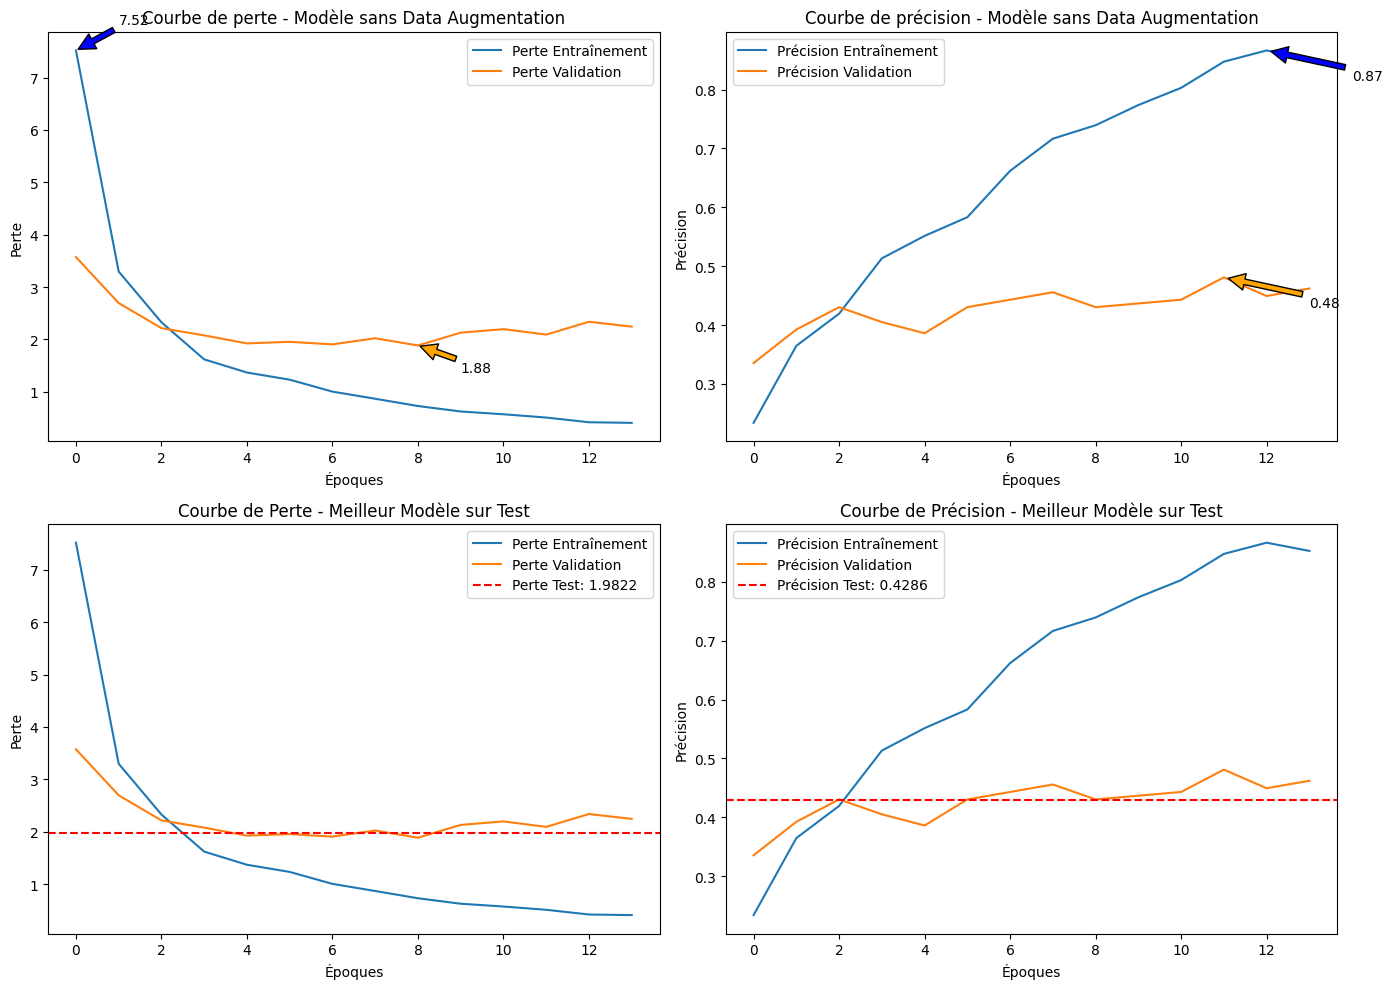

In [ ]:

# Importation des bibliothèques nécessaires

import matplotlib.pyplot as plt  # Bibliothèque pour visualiser les données sous forme de graphiques


# Visualisation des courbes d'entraînement (Perte et Précision)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
# Crée une figure avec une grille de 2x2 sous-graphiques. Chaque graphique aura une taille de 14x10 pouces.

# Courbe de perte (Entraînement et Validation)
axes[0, 0].plot(history1.history['loss'], label='Perte Entraînement')
# Trace la courbe de perte sur l'ensemble d'entraînement.
axes[0, 0].plot(history1.history['val_loss'], label='Perte Validation')
# Trace la courbe de perte sur l'ensemble de validation.

# Annotations pour les pics de perte
max_loss_train = max(history1.history['loss'])
# Récupère la valeur maximale de la perte sur l'ensemble d'entraînement.
min_loss_val = min(history1.history['val_loss'])
# Récupère la valeur minimale de la perte sur l'ensemble de validation.
axes[0, 0].annotate(f'{max_loss_train:.2f}', xy=(0, max_loss_train), xytext=(1, max_loss_train + 0.5),
                    arrowprops=dict(facecolor='blue', shrink=0.05))
# Ajoute une annotation pour le pic de perte maximale sur l'ensemble d'entraînement.
axes[0, 0].annotate(f'{min_loss_val:.2f}', xy=(history1.history['val_loss'].index(min_loss_val), min_loss_val),
                    xytext=(history1.history['val_loss'].index(min_loss_val) + 1, min_loss_val - 0.5),
                    arrowprops=dict(facecolor='orange', shrink=0.05))
# Ajoute une annotation pour le pic de perte minimale sur l'ensemble de validation.

axes[0, 0].set_title("Courbe de perte - Modèle sans Data Augmentation")
# Définit le titre du graphique pour la courbe de perte.
axes[0, 0].set_xlabel("Époques")
# Définit le label pour l'axe des x.
axes[0, 0].set_ylabel("Perte")
# Définit le label pour l'axe des y.
axes[0, 0].legend()
# Ajoute une légende au graphique.

# Courbe de précision (Entraînement et Validation)
axes[0, 1].plot(history1.history['accuracy'], label='Précision Entraînement')
# Trace la courbe de précision sur l'ensemble d'entraînement.
axes[0, 1].plot(history1.history['val_accuracy'], label='Précision Validation')
# Trace la courbe de précision sur l'ensemble de validation.

# Annotations pour les pics de précision
max_accuracy_train = max(history1.history['accuracy'])
# Récupère la valeur maximale de précision sur l'ensemble d'entraînement.
max_accuracy_val = max(history1.history['val_accuracy'])
# Récupère la valeur maximale de précision sur l'ensemble de validation.
axes[0, 1].annotate(f'{max_accuracy_train:.2f}', xy=(history1.history['accuracy'].index(max_accuracy_train), max_accuracy_train),
                    xytext=(history1.history['accuracy'].index(max_accuracy_train) + 2, max_accuracy_train - 0.05),
                    arrowprops=dict(facecolor='blue', shrink=0.05))
# Ajoute une annotation pour le pic de précision maximale sur l'ensemble d'entraînement.
axes[0, 1].annotate(f'{max_accuracy_val:.2f}', xy=(history1.history['val_accuracy'].index(max_accuracy_val), max_accuracy_val),
                    xytext=(history1.history['val_accuracy'].index(max_accuracy_val) + 2, max_accuracy_val - 0.05),
                    arrowprops=dict(facecolor='orange', shrink=0.05))
# Ajoute une annotation pour le pic de précision maximale sur l'ensemble de validation.

axes[0, 1].set_title("Courbe de précision - Modèle sans Data Augmentation")
# Définit le titre du graphique pour la courbe de précision.
axes[0, 1].set_xlabel("Époques")
# Définit le label pour l'axe des x.
axes[0, 1].set_ylabel("Précision")
# Définit le label pour l'axe des y.
axes[0, 1].legend()
# Ajoute une légende au graphique.

# Courbe de perte avec validation et test
axes[1, 0].plot(history1.history['loss'], label='Perte Entraînement')
# Trace à nouveau la courbe de perte sur l'ensemble d'entraînement.
axes[1, 0].plot(history1.history['val_loss'], label='Perte Validation')
# Trace à nouveau la courbe de perte sur l'ensemble de validation.
axes[1, 0].axhline(y=loss, color='red', linestyle='dashed', label=f'Perte Test: {loss:.4f}')
# Ajoute une ligne horizontale indiquant la perte obtenue sur l'ensemble de test.
axes[1, 0].set_title("Courbe de Perte - Meilleur Modèle sur Test")
# Définit le titre du graphique pour la courbe combinée avec les résultats du test.
axes[1, 0].set_xlabel("Époques")
# Définit le label pour l'axe des x.
axes[1, 0].set_ylabel("Perte")
# Définit le label pour l'axe des y.
axes[1, 0].legend()
# Ajoute une légende au graphique.

# Courbe de précision avec validation et test
axes[1, 1].plot(history1.history['accuracy'], label='Précision Entraînement')
# Trace à nouveau la courbe de précision sur l'ensemble d'entraînement.
axes[1, 1].plot(history1.history['val_accuracy'], label='Précision Validation')
# Trace à nouveau la courbe de précision sur l'ensemble de validation.
axes[1, 1].axhline(y=accuracy, color='red', linestyle='dashed', label=f'Précision Test: {accuracy:.4f}')
# Ajoute une ligne horizontale indiquant la précision obtenue sur l'ensemble de test.
axes[1, 1].set_title("Courbe de Précision - Meilleur Modèle sur Test")
# Définit le titre du graphique pour la courbe combinée avec les résultats du test.
axes[1, 1].set_xlabel("Époques")
# Définit le label pour l'axe des x.
axes[1, 1].set_ylabel("Précision")
# Définit le label pour l'axe des y.
axes[1, 1].legend()
# Ajoute une légende au graphique.

plt.tight_layout()
# Ajuste automatiquement les espaces entre les sous-graphiques pour éviter qu'ils se chevauchent.

plt.show()
# Affiche tous les graphiques créés dans cette figure.


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 449ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 337ms/step


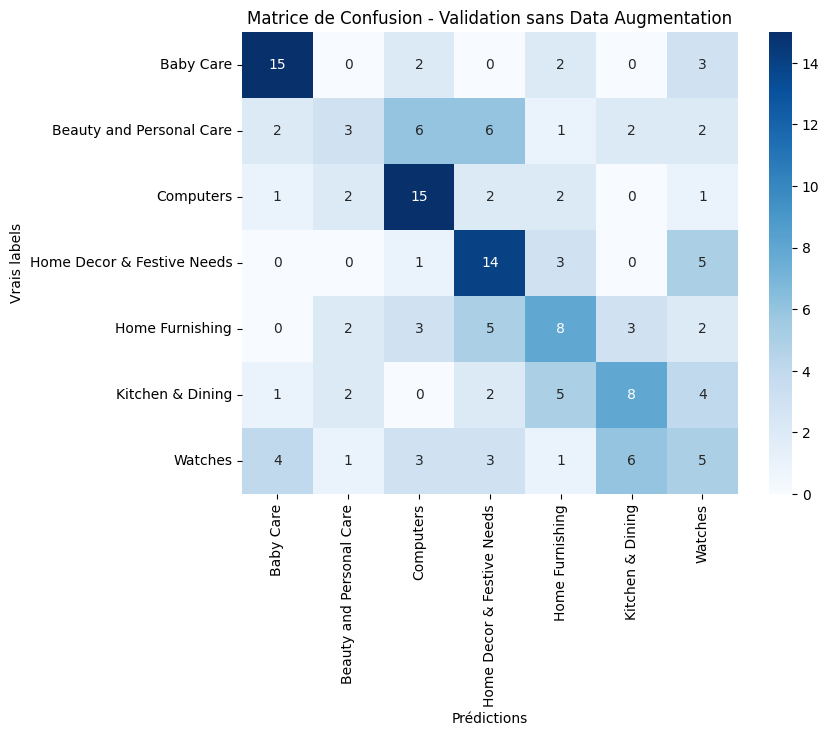


Rapport de classification - Validation :
                            precision    recall  f1-score   support

                 Baby Care       0.65      0.68      0.67        22
  Beauty and Personal Care       0.30      0.14      0.19        22
                 Computers       0.50      0.65      0.57        23
Home Decor & Festive Needs       0.44      0.61      0.51        23
           Home Furnishing       0.36      0.35      0.36        23
          Kitchen & Dining       0.42      0.36      0.39        22
                   Watches       0.23      0.22      0.22        23

                  accuracy                           0.43       158
                 macro avg       0.41      0.43      0.41       158
              weighted avg       0.41      0.43      0.41       158



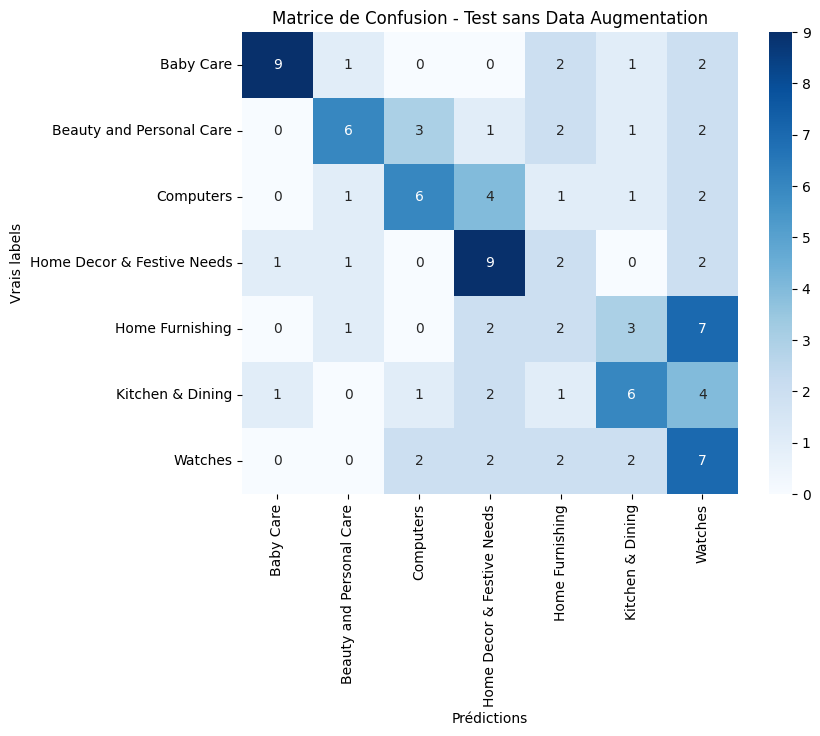


Rapport de classification - Test :
                            precision    recall  f1-score   support

                 Baby Care       0.82      0.60      0.69        15
  Beauty and Personal Care       0.60      0.40      0.48        15
                 Computers       0.50      0.40      0.44        15
Home Decor & Festive Needs       0.45      0.60      0.51        15
           Home Furnishing       0.17      0.13      0.15        15
          Kitchen & Dining       0.43      0.40      0.41        15
                   Watches       0.27      0.47      0.34        15

                  accuracy                           0.43       105
                 macro avg       0.46      0.43      0.43       105
              weighted avg       0.46      0.43      0.43       105



In [ ]:

# Matrices de confusion & Rapport de classification (Validation et Test)

import seaborn as sns  # Importation de la bibliothèque Seaborn pour créer des heatmaps (matrices de confusion)
from sklearn.metrics import confusion_matrix, classification_report  # Importation des fonctions pour calculer la matrice de confusion et le rapport de classification

# Prédictions sur l'ensemble de validation
y_val_pred = model1.predict(X_val)
# Utilise le modèle `model1` pour prédire les labels sur l'ensemble de validation (X_val).
y_val_pred = np.argmax(y_val_pred, axis=1)
# Convertit les prédictions en indices correspondant aux classes prédites.

# Prédictions sur l'ensemble de test
y_test_pred = model1.predict(X_test)
# Utilise le modèle `model1` pour prédire les labels sur l'ensemble de test (X_test).
y_test_pred = np.argmax(y_test_pred, axis=1)
# Convertit les prédictions en indices correspondant aux classes prédites.

# Vrais labels pour validation et test
y_val_true = np.argmax(y_val, axis=1)
# Convertit les labels réels de validation (One-Hot Encoded) en indices correspondant aux classes.
y_test_true = np.argmax(y_test, axis=1)
# Convertit les labels réels de test (One-Hot Encoded) en indices correspondant aux classes.

# Noms des catégories
category_names = [
    'Baby Care',
    'Beauty and Personal Care',
    'Computers',
    'Home Decor & Festive Needs',
    'Home Furnishing',
    'Kitchen & Dining',
    'Watches'
]
# Liste contenant les noms des catégories/classes utilisées dans le dataset.

# Matrice de confusion pour validation
conf_matrix_val = confusion_matrix(y_val_true, y_val_pred)
# Calcule la matrice de confusion entre les vrais labels (`y_val_true`) et les labels prédits (`y_val_pred`) pour l'ensemble de validation.
plt.figure(figsize=(8, 6))
# Crée une figure avec une taille spécifique pour afficher la matrice de confusion.
sns.heatmap(conf_matrix_val,
            annot=True,  # Affiche les valeurs dans chaque cellule du heatmap.
            fmt='d',  # Format des valeurs affichées (entiers).
            cmap='Blues',  # Palette de couleurs utilisée pour le heatmap.
            xticklabels=category_names,  # Noms des catégories pour l'axe des x (Prédictions).
            yticklabels=category_names)  # Noms des catégories pour l'axe des y (Vrais labels).
plt.xlabel("Prédictions")  # Label pour l'axe des x.
plt.ylabel("Vrais labels")  # Label pour l'axe des y.
plt.title("Matrice de Confusion - Validation sans Data Augmentation")
# Titre du graphique indiquant qu'il s'agit de la matrice de confusion pour l'ensemble de validation sans Data Augmentation.
plt.show()
# Affiche la matrice de confusion.

print("\nRapport de classification - Validation :")
# Affiche une description textuelle avant le rapport de classification.
print(classification_report(y_val_true, y_val_pred, target_names=category_names))
# Génère un rapport détaillé contenant précision, rappel et F1-score pour chaque classe sur l'ensemble de validation.

# Matrice de confusion pour test
conf_matrix_test = confusion_matrix(y_test_true, y_test_pred)
# Calcule la matrice de confusion entre les vrais labels (`y_test_true`) et les labels prédits (`y_test_pred`) pour l'ensemble de test.
plt.figure(figsize=(8, 6))
# Crée une figure avec une taille spécifique pour afficher la matrice de confusion.
sns.heatmap(conf_matrix_test,
            annot=True,  # Affiche les valeurs dans chaque cellule du heatmap.
            fmt='d',  # Format des valeurs affichées (entiers).
            cmap='Blues',  # Palette de couleurs utilisée pour le heatmap.
            xticklabels=category_names,  # Noms des catégories pour l'axe des x (Prédictions).
            yticklabels=category_names)  # Noms des catégories pour l'axe des y (Vrais labels).
plt.xlabel("Prédictions")  # Label pour l'axe des x.
plt.ylabel("Vrais labels")  # Label pour l'axe des y.
plt.title("Matrice de Confusion - Test sans Data Augmentation")
# Titre du graphique indiquant qu'il s'agit de la matrice de confusion pour l'ensemble de test sans Data Augmentation.
plt.show()
# Affiche la matrice de confusion.

print("\nRapport de classification - Test :")
# Affiche une description textuelle avant le rapport de classification.
print(classification_report(y_test_true, y_test_pred, target_names=category_names))
# Génère un rapport détaillé contenant précision, rappel et F1-score pour chaque classe sur l'ensemble de test.


- Definition des métriques de la matrice de confusion :
1. Precision (Précision) → Proportion des éléments correctement classés parmi ceux prédit comme appartenant à une classe donnée.
2. Recall (Rappel ou Sensibilité) → Proportion des éléments correctement classés parmi ceux qui appartiennent réellement à une classe donnée.
3. F1-score → Moyenne harmonique entre la précision et le rappel, utile quand on veut un bon équilibre entre les deux.
4. Support → Nombre total d’exemples réels appartenant à une classe donnée. Interprétation : Plus le support est élevé, plus la classe est représentée dans le jeu de données.
5. Précision = Parmi les prédictions positives, combien sont correctes ?
6. Rappel = Parmi les vrais éléments d’une classe, combien sont bien détectés ?
7. F1-score = Moyenne équilibrée entre Précision et Rappel.
8. Support = Nombre d'éléments réels par classe.

# Passage de **CNN/VGG16** à Vision Transformer (ViT)
Nous utilison ici une approche basée sur le Transformer pour la classification d’images.

In [34]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 31.8 MB/s eta 0:00:00


In [36]:
# Installation
# !pip install timm
import timm

In [56]:
import pandas as pd
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
import torch

# Chemin vers les images et le CSV
image_dir = "/content/drive/MyDrive/Images"
df = pictorial_dataset[["image", "label_name"]].copy()

# Nettoyage des labels (enlever les espaces éventuels)
df["label_name"] = df["label_name"].str.strip()

# Dictionnaire label -> index numérique
class_names = sorted(df["label_name"].unique())
class_to_idx = {cls: i for i, cls in enumerate(class_names)}
print("Classes détectées :", class_to_idx)

# Dataset personnalisé basé sur le DataFrame
class CSVDataset(Dataset):
    def __init__(self, dataframe, image_dir, transform=None):
        self.df = dataframe.reset_index(drop=True)
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_name = self.df.iloc[idx]["image"]
        label_name = self.df.iloc[idx]["label_name"]
        label = class_to_idx[label_name]

        img_path = os.path.join(self.image_dir, img_name)
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, label


✅ Classes détectées : {'Baby Care': 0, 'Beauty and Personal Care': 1, 'Computers': 2, 'Home Decor & Festive Needs': 3, 'Home Furnishing': 4, 'Kitchen & Dining': 5, 'Watches': 6}


- Nous avons bien 7 catégories respectives

In [62]:
# Étape 1 : Définir les transformations à appliquer aux images (comme pour CNN)
# Resize à 224x224 (taille d’entrée standard), normalisation sur 3 canaux RGB
transform = transforms.Compose([
    transforms.Resize((224, 224)),                  # Redimensionne l’image à 224x224 pixels
    transforms.ToTensor(),                          # Convertit l’image PIL en tenseur PyTorch
    transforms.Normalize([0.5]*3, [0.5]*3)           # Normalisation des valeurs de pixel entre -1 et 1
])

# Étape 2 : Créer un dataset personnalisé à partir du DataFrame (df)
# Ce dataset lit les images et les associe à leur classe selon la colonne 'label_name'
dataset = CSVDataset(df, image_dir, transform=transform)

# Étape 3 : Découpage du dataset en trois parties (random_split = NON stratifié)
# Ici, on découpe aléatoirement selon un ratio 70/15/15 (train/val/test)
train_size = int(0.7 * len(dataset))                # 70% pour l'entraînement
val_size = int(0.15 * len(dataset))                 # 15% pour la validation
test_size = len(dataset) - train_size - val_size    # 15% restant pour le test

# Cette méthode ne garantit PAS l'équilibre des classes dans chaque split
# Notre dataset est effictement homogène
train_set, val_set, test_set = random_split(dataset, [train_size, val_size, test_size])

# Étape 4 : Création des DataLoaders pour chaque split
# Permet de charger les données par batch pendant l'entraînement et le test
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32)
test_loader = DataLoader(test_set, batch_size=32)

# Affichage du total d’images chargées
print(f" {len(dataset)} images chargées depuis pictorial_dataset")


 1050 images chargées depuis pictorial_dataset


In [63]:
import timm
from torch import nn, optim

# Initialisation du modèle ViT (pré-entraîné)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = timm.create_model('vit_base_patch16_224', pretrained=True, num_classes=len(class_names))
model = model.to(device)

# Fonction de perte + optimiseur
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=2e-5)


In [64]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    print(f"📘 Epoch {epoch+1}/{num_epochs} - Loss: {avg_loss:.4f}")


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


📘 Epoch 1/10 - Loss: 0.9772
📘 Epoch 2/10 - Loss: 0.1229
📘 Epoch 3/10 - Loss: 0.0252
📘 Epoch 4/10 - Loss: 0.0085
📘 Epoch 5/10 - Loss: 0.0029
📘 Epoch 6/10 - Loss: 0.0014
📘 Epoch 7/10 - Loss: 0.0010
📘 Epoch 8/10 - Loss: 0.0008
📘 Epoch 9/10 - Loss: 0.0006
📘 Epoch 10/10 - Loss: 0.0005


📊 Rapport de classification - ViT :
                            precision    recall  f1-score   support

                 Baby Care       0.94      0.74      0.83        23
  Beauty and Personal Care       0.84      0.76      0.80        21
                 Computers       0.87      1.00      0.93        20
Home Decor & Festive Needs       0.80      0.87      0.83        23
           Home Furnishing       0.86      0.96      0.91        25
          Kitchen & Dining       0.90      0.90      0.90        20
                   Watches       1.00      0.96      0.98        26

                  accuracy                           0.89       158
                 macro avg       0.89      0.88      0.88       158
              weighted avg       0.89      0.89      0.88       158



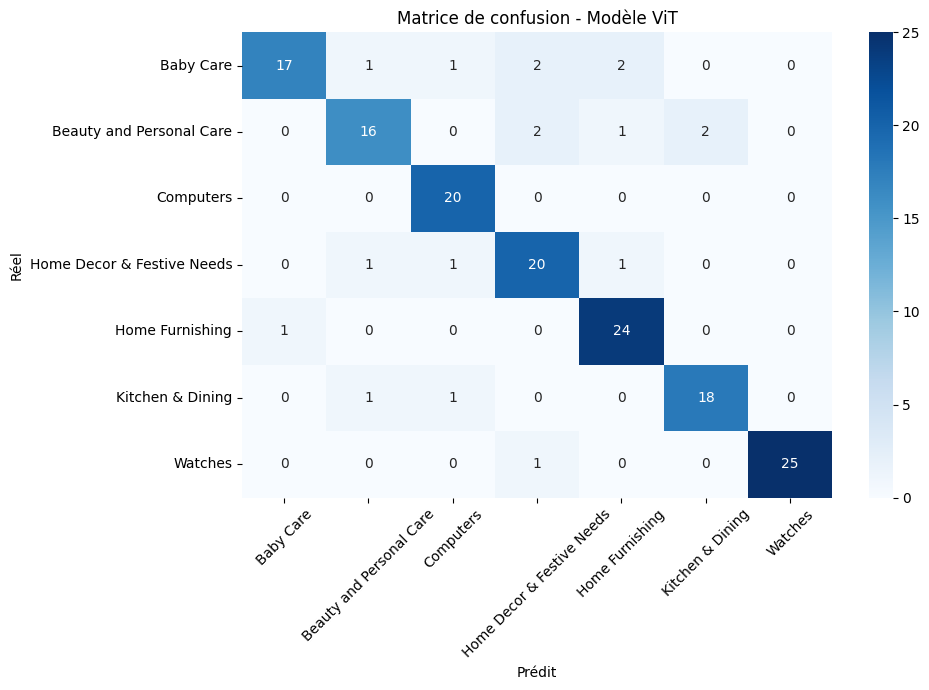

In [65]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Rapport de classification
print(" Rapport de classification - ViT :")
print(classification_report(all_labels, all_preds, target_names=class_names))

# Matrice de confusion
cm = confusion_matrix(all_labels, all_preds, labels=list(range(len(class_names))))

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion - Modèle ViT")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/torch_xla/__init__.py:251: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


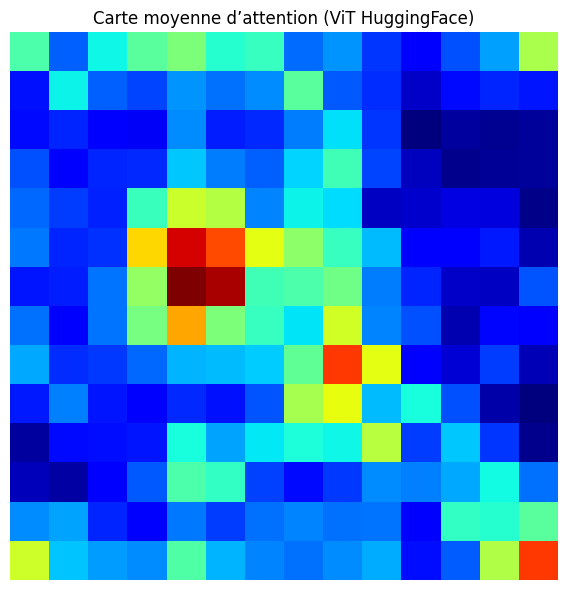

In [83]:
!pip install transformers timm --quiet

import torch
import numpy as np
import matplotlib.pyplot as plt
from transformers import ViTModel, ViTImageProcessor
from PIL import Image
import os

# Chemin des images
image_dir = "/content/drive/MyDrive/Images"
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.jpg')])[:3]

# Prétraitement HuggingFace
processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224")
model = ViTModel.from_pretrained("google/vit-base-patch16-224", output_attentions=True)
model.eval()

attn_all = []

for file in image_files:
    img = Image.open(os.path.join(image_dir, file)).convert("RGB")
    inputs = processor(images=img, return_tensors="pt")

    with torch.no_grad():
        outputs = model(**inputs)

    # [batch, num_heads, tokens, tokens]
    attn = outputs.attentions  # list of layers
    attn_rollout = torch.eye(attn[0].size(-1))

    for layer_attn in attn:
        attn_avg = layer_attn[0].mean(0)  # moyenne sur les heads
        attn_avg += torch.eye(attn_avg.shape[0])
        attn_avg /= attn_avg.sum(dim=-1, keepdim=True)
        attn_rollout = attn_avg @ attn_rollout

    # extraire attention CLS vers les patches
    cls_map = attn_rollout[0, 1:].reshape(14, 14).cpu().numpy()
    attn_all.append(cls_map)

# Moyenne des cartes
mean_map = np.mean(attn_all, axis=0)

# Affichage
plt.figure(figsize=(6, 6))
plt.imshow(mean_map, cmap="jet")
plt.title("Carte moyenne d’attention (ViT HuggingFace)")
plt.axis("off")
plt.tight_layout()
plt.savefig("/content/attention_moyenne_vit_hf.png")
plt.show()
